In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from Net import Net
from utils import train, test, plt_graph

In [2]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           2,304
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
           Conv2d-10            [-1, 8, 24, 24]             576
             ReLU-11            [-1, 8, 24, 24]               0
      BatchNorm2d-12            [-1, 8, 24, 24]              16
          Dropout-13            [-1, 8, 24, 24]               0
        MaxPool2d-14            [-1, 8,

In [3]:
torch.manual_seed(1)
batch_size = 32

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
from torch.optim.lr_scheduler import StepLR
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
scheduler = StepLR(optimizer, step_size=6, gamma=0.25)

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, 20):
    train_acc,train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
    test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
    for param_group in optimizer.param_groups:
      print(param_group['lr'],epoch+1)
    scheduler.step()

Train: Loss=0.0440 Batch_id=1874 Accuracy=91.38: 100%|██████████| 1875/1875 [00:42<00:00, 43.77it/s]


Test set: Average loss: 0.0021, Accuracy: 9792/10000 (97.92%)

0.01 2


Train: Loss=0.1022 Batch_id=1874 Accuracy=97.28: 100%|██████████| 1875/1875 [00:39<00:00, 47.89it/s]


Test set: Average loss: 0.0019, Accuracy: 9810/10000 (98.10%)

0.01 3


Train: Loss=0.0025 Batch_id=1874 Accuracy=97.74: 100%|██████████| 1875/1875 [00:40<00:00, 46.41it/s]


Test set: Average loss: 0.0014, Accuracy: 9859/10000 (98.59%)

0.01 4


Train: Loss=0.0289 Batch_id=1874 Accuracy=98.01: 100%|██████████| 1875/1875 [00:41<00:00, 45.12it/s]


Test set: Average loss: 0.0011, Accuracy: 9891/10000 (98.91%)

0.01 5


Train: Loss=0.0264 Batch_id=1874 Accuracy=98.11: 100%|██████████| 1875/1875 [00:40<00:00, 46.83it/s]


Test set: Average loss: 0.0011, Accuracy: 9880/10000 (98.80%)

0.01 6


Train: Loss=0.0244 Batch_id=1874 Accuracy=98.37: 100%|██████████| 1875/1875 [00:40<00:00, 46.57it/s]


Test set: Average loss: 0.0011, Accuracy: 9887/10000 (98.87%)

0.01 7


Train: Loss=0.0071 Batch_id=1874 Accuracy=98.59: 100%|██████████| 1875/1875 [00:40<00:00, 46.33it/s]


Test set: Average loss: 0.0009, Accuracy: 9914/10000 (99.14%)

0.0025 8


Train: Loss=0.0332 Batch_id=1874 Accuracy=98.72: 100%|██████████| 1875/1875 [00:40<00:00, 46.70it/s]


Test set: Average loss: 0.0007, Accuracy: 9928/10000 (99.28%)

0.0025 9


Train: Loss=0.0113 Batch_id=1874 Accuracy=98.74: 100%|██████████| 1875/1875 [00:40<00:00, 45.76it/s]


Test set: Average loss: 0.0008, Accuracy: 9929/10000 (99.29%)

0.0025 10


Train: Loss=0.0097 Batch_id=1874 Accuracy=98.74: 100%|██████████| 1875/1875 [00:39<00:00, 47.35it/s]


Test set: Average loss: 0.0008, Accuracy: 9912/10000 (99.12%)

0.0025 11


Train: Loss=0.0017 Batch_id=1874 Accuracy=98.79: 100%|██████████| 1875/1875 [00:41<00:00, 45.72it/s]


Test set: Average loss: 0.0008, Accuracy: 9908/10000 (99.08%)

0.0025 12


Train: Loss=0.1211 Batch_id=1874 Accuracy=98.86: 100%|██████████| 1875/1875 [00:41<00:00, 45.32it/s]


Test set: Average loss: 0.0007, Accuracy: 9927/10000 (99.27%)

0.0025 13


Train: Loss=0.0520 Batch_id=1874 Accuracy=98.95: 100%|██████████| 1875/1875 [00:43<00:00, 43.36it/s]


Test set: Average loss: 0.0007, Accuracy: 9924/10000 (99.24%)

0.000625 14


Train: Loss=0.0012 Batch_id=1874 Accuracy=98.92: 100%|██████████| 1875/1875 [00:44<00:00, 42.40it/s]


Test set: Average loss: 0.0007, Accuracy: 9922/10000 (99.22%)

0.000625 15


Train: Loss=0.0011 Batch_id=1874 Accuracy=98.92: 100%|██████████| 1875/1875 [00:42<00:00, 43.80it/s]


Test set: Average loss: 0.0008, Accuracy: 9922/10000 (99.22%)

0.000625 16


Train: Loss=0.0479 Batch_id=1874 Accuracy=98.96: 100%|██████████| 1875/1875 [00:41<00:00, 44.68it/s]


Test set: Average loss: 0.0008, Accuracy: 9918/10000 (99.18%)

0.000625 17


Train: Loss=0.0019 Batch_id=1874 Accuracy=98.98: 100%|██████████| 1875/1875 [00:42<00:00, 43.87it/s]


Test set: Average loss: 0.0008, Accuracy: 9922/10000 (99.22%)

0.000625 18


Train: Loss=0.0166 Batch_id=1874 Accuracy=98.98: 100%|██████████| 1875/1875 [00:43<00:00, 43.24it/s]


Test set: Average loss: 0.0007, Accuracy: 9925/10000 (99.25%)

0.000625 19


Train: Loss=0.0206 Batch_id=1874 Accuracy=98.98: 100%|██████████| 1875/1875 [00:43<00:00, 43.27it/s]


Test set: Average loss: 0.0007, Accuracy: 9928/10000 (99.28%)

0.00015625 20


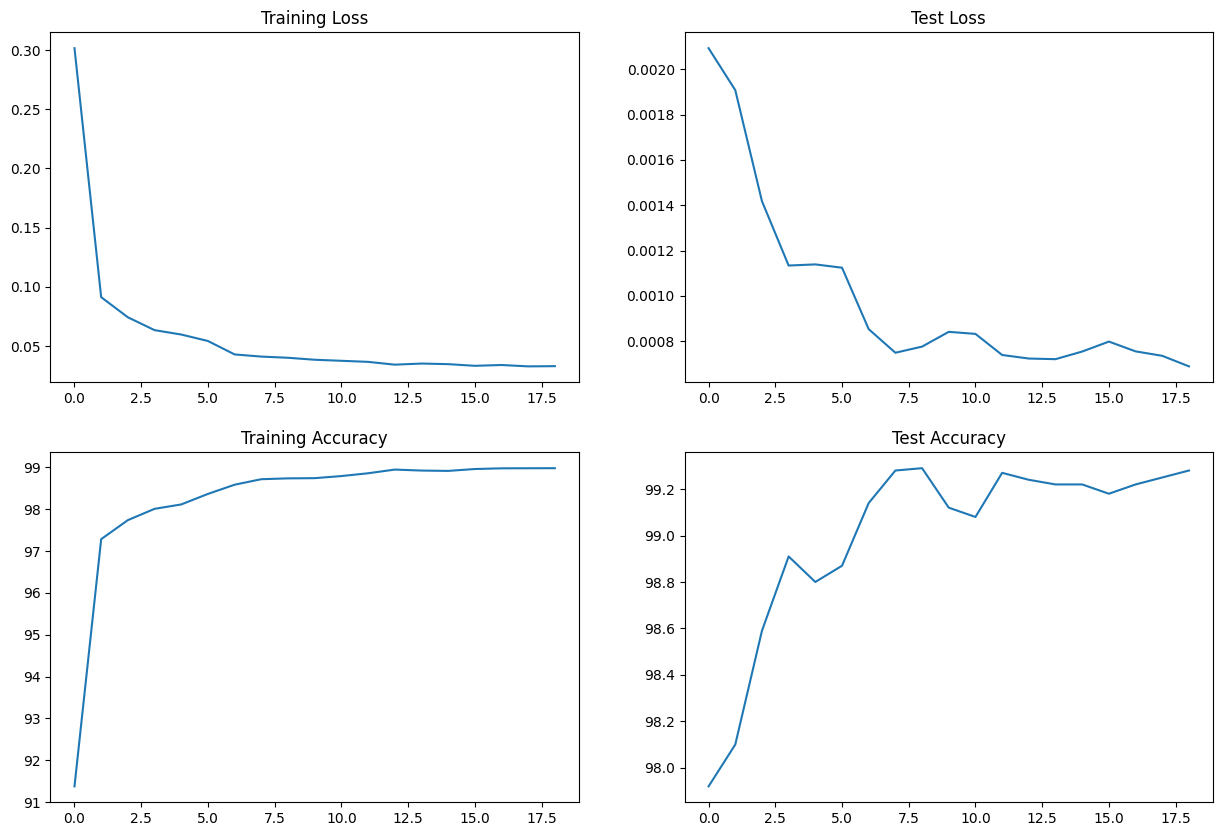

In [5]:
plt_graph(train_losses,test_losses,train_acc,test_acc)